# Import Libraries

In [34]:
import pandas as pd
import os
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

# Load Data

In [35]:
parent_path = 'D:\Programs\DeepLearing\Stock_prize_Prediction\Data'
Data_file_paths = [f'{parent_path}\{i}' for i in os.listdir(parent_path)]
Data_file_paths

['D:\\Programs\\DeepLearing\\Stock_prize_Prediction\\Data\\Inflation consumer prices (annual ).csv',
 'D:\\Programs\\DeepLearing\\Stock_prize_Prediction\\Data\\Inflation consumer prices (annual )_clean.csv',
 'D:\\Programs\\DeepLearing\\Stock_prize_Prediction\\Data\\Stocks.xlsx',
 'D:\\Programs\\DeepLearing\\Stock_prize_Prediction\\Data\\Wholesale price index (2010 is 100).csv',
 'D:\\Programs\\DeepLearing\\Stock_prize_Prediction\\Data\\Wholesale price index (2010 is 100)_clean.csv']

In [36]:
clean_datasets = [i for i in Data_file_paths if i.endswith('_clean.csv')]
Stocks_excel_file = [i for i in Data_file_paths if i.endswith('.xlsx')][0]
print(clean_datasets,Stocks_excel_file,sep='\n')

['D:\\Programs\\DeepLearing\\Stock_prize_Prediction\\Data\\Inflation consumer prices (annual )_clean.csv', 'D:\\Programs\\DeepLearing\\Stock_prize_Prediction\\Data\\Wholesale price index (2010 is 100)_clean.csv']
D:\Programs\DeepLearing\Stock_prize_Prediction\Data\Stocks.xlsx


## Reading Data and Adjusting Settings

### Common Preprocessing and Analysis functions

In [42]:
def Save_plot(f_name):
    plt.tight_layout()
    plt.savefig(f"D:\Programs\DeepLearing\Stock_prize_Prediction\Plots\Infliation_plots\{f_name}.pdf", bbox_inches='tight')
    return
def Plot_inactive_years(df):
    nan_counts = df.isnull().sum()
    nan_counts_years = nan_counts[[str(i) for i in range(1960,2022)]]
    plt.figure(figsize=(12,6))
    sns.barplot(x=nan_counts_years.index, y=nan_counts_years.values)
    plt.xticks(rotation=90)
    plt.xlabel("Years")
    plt.ylabel("Count of NaN Values")
    plt.title("# of inactive countries in each year")
    Save_plot("Count of NaN Values")
    plt.show()
    
def Plot_Line_plot_multiple_cols(df,cols):
    for col in cols:
        marker = np.random.choice(['o', 's', '^', 'D',"v","2","1"])
        plt.plot(df.index, df[col], label=col.upper(), marker=marker)
    plt.legend()
    
    
    
def Row_wise_describe(df):
    return df.apply(pd.Series.describe, axis=1)

def N_largest_rows(df,n):
    return df.apply(lambda x: x.nlargest(n), axis=0)

### Infliation Data (*Inflation, consumer prices (annual %)*)

In [38]:
df_infilation = pd.read_csv(clean_datasets[0])
df_infilation.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,9.158707,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,6.362961,6.079328
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,6.441213,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.578375,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.437609,3.837868
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,10.277905,8.777814,7.280387,9.353840,30.698958,29.842578,19.630594,17.079704,22.271564,25.754266


#### Infliation Preprocessing

##### Small Intisites on the data about ⬇️
1. Total how many countries data do we have?
2. How many years data do we have?

In [39]:
print(f'1. Total how many countries data do we have? --> {df_infilation.shape[0]}\n2. How many years data do we have? --> {df_infilation.shape[1]-4} ')

1. Total how many countries data do we have? --> 266
2. How many years data do we have? --> 62 


**Lets check active trade years of all the countries**

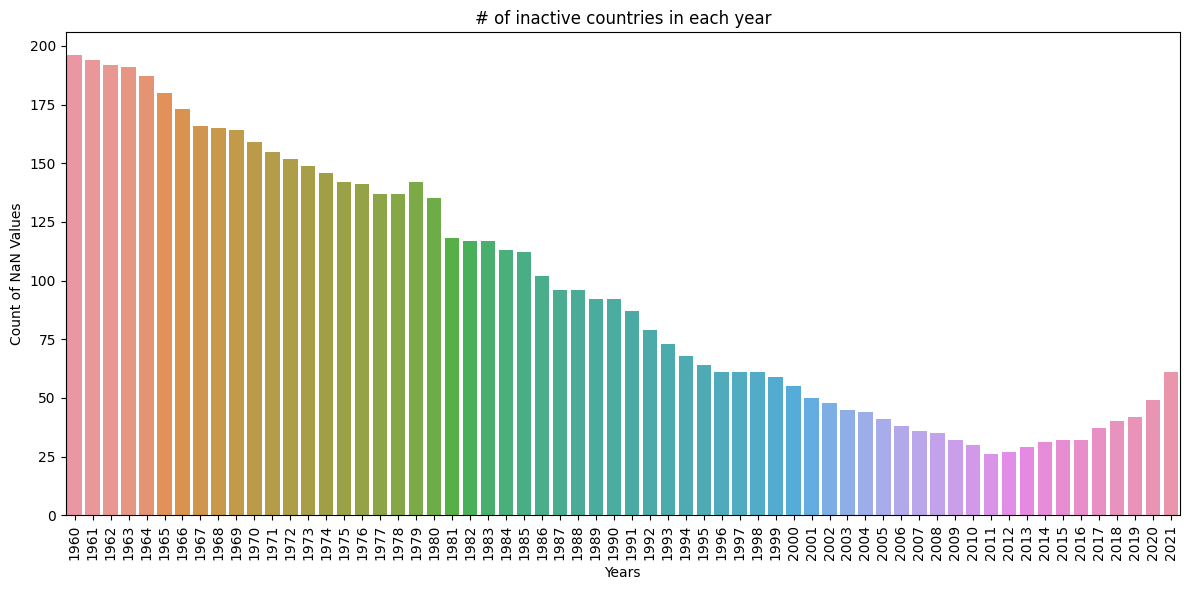

In [40]:
Plot_inactive_years(df_infilation)

##### **--> After observing the above ⬆️ figure we decided to choose to select a range of year for our analysis.**

*We are just considering data from year 2000 in both infilation data*

In [8]:
df_infilation.columns

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
       '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
       '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021'],
      dtype='object')

In [9]:
valid_cols = ['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code']+[str(i) for i in range(2000,2022)]
df_infilation = df_infilation[valid_cols]

In [10]:
df_infilation.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Aruba,ABW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,4.044021,2.883604,3.315247,3.656365,2.529129,3.397787,...,0.627472,-2.372065,0.421441,0.474764,-0.931196,-1.028282,3.626041,4.257462,NaN,NaN
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,8.601485,5.840354,8.763754,7.449700,5.023421,8.558038,...,9.158707,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,6.362961,6.079328
2,Afghanistan,AFG,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,NaN,NaN,NaN,NaN,NaN,12.686269,...,6.441213,7.385772,4.673996,-0.661709,4.383892,4.975952,0.626149,2.302373,NaN,NaN
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,2.530775,4.361529,3.188693,1.760904,0.694336,5.631634,...,4.578375,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.437609,3.837868
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,324.996872,152.561023,108.897436,98.224144,43.542107,22.953514,...,10.277905,8.777814,7.280387,9.353840,30.698958,29.842578,19.630594,17.079704,22.271564,25.754266


**Still we have few countries which are inactive for these 22 years as we considering so lets drop those countries.**

In [11]:
df_infilation = df_infilation.dropna()
df_infilation.head()

,Country Name,Country Code,Indicator Name,Indicator Code,2000,2001,2002,2003,2004,2005,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
1,Africa Eastern and Southern,AFE,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,8.601485,5.840354,8.763754,7.449700,5.023421,8.558038,...,9.158707,5.750981,5.370290,5.250171,6.571396,6.399343,4.720811,4.120246,6.362961,6.079328
3,Africa Western and Central,AFW,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,2.530775,4.361529,3.188693,1.760904,0.694336,5.631634,...,4.578375,2.439201,1.758052,2.130268,1.494564,1.764635,1.784050,1.758565,2.437609,3.837868
4,Angola,AGO,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,324.996872,152.561023,108.897436,98.224144,43.542107,22.953514,...,10.277905,8.777814,7.280387,9.353840,30.698958,29.842578,19.630594,17.079704,22.271564,25.754266
5,Albania,ALB,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,0.050018,3.107588,7.770526,0.484003,2.280019,2.366582,...,2.031593,1.937621,1.625865,3.501208,-0.367317,2.060598,2.028060,1.411091,1.620887,2.041472
7,Arab World,ARB,"Inflation, consumer prices (annual %)",FP.CPI.TOTL.ZG,1.853790,1.772204,1.832994,2.712592,3.632280,3.493685,...,4.611844,3.238108,2.773516,1.814077,2.068840,1.966826,2.458142,1.091848,1.777408,3.423629


##### How many countries data is there after preprocessing ⬇️
1. Total how many countries data do we have?
2. How many years data do we have?

In [12]:
print(f'1. Total how many countries data do we have? --> {df_infilation.shape[0]}\n2. How many years data do we have? --> {df_infilation.shape[1]-4} ')

1. Total how many countries data do we have? --> 191
2. How many years data do we have? --> 22 


#### Infliation Analysis

In [13]:
describe_infliation = Row_wise_describe(df_infilation.drop(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'],axis=1))
describe_infliation.set_index(df_infilation['Country Code'],inplace=True)
describe_infliation

,count,mean,std,min,25%,50%,75%,max
Country Code,,,,,,,,
AFE,22.0,7.154524,2.032989,4.120246,5.590899,6.485370,8.723187,12.566645
AFW,22.0,3.077877,1.737416,0.694336,1.769489,2.484988,3.973491,8.452976
AGO,22.0,45.993530,72.815276,7.280387,12.683174,18.355149,30.484863,324.996872
ALB,22.0,2.358918,1.603779,-0.367317,1.703804,2.163760,3.063862,7.770526
ARB,22.0,3.257567,2.078892,1.091848,1.882049,2.847207,3.610457,11.270665
...,...,...,...,...,...,...,...,...
VUT,22.0,2.511178,1.287247,0.798864,1.428923,2.413276,3.067455,5.329351
WLD,22.0,3.357465,1.573599,1.434318,2.369386,3.185957,3.808761,8.949953
WSM,22.0,3.504410,4.182420,-1.568912,0.824451,1.952891,4.975927,16.313151


##### Top 5 Countries with Max infliation in 22 years

In [14]:
top_5_max = describe_infliation.nlargest(5,'max')
top_5_max

,count,mean,std,min,25%,50%,75%,max
Country Code,,,,,,,,
SDN,22.0,43.542748,82.086110,1.935296,10.057349,17.329912,36.281523,382.815998
AGO,22.0,45.993530,72.815276,7.280387,12.683174,18.355149,30.484863,324.996872
BLR,22.0,26.629222,36.336343,4.872302,7.908499,13.240073,25.876445,168.620236
ECU,22.0,9.266394,20.939907,-0.338872,1.865245,3.426563,5.145407,96.094114
SRB,22.0,14.126608,23.165412,1.122314,2.344602,7.512325,11.577367,95.005226


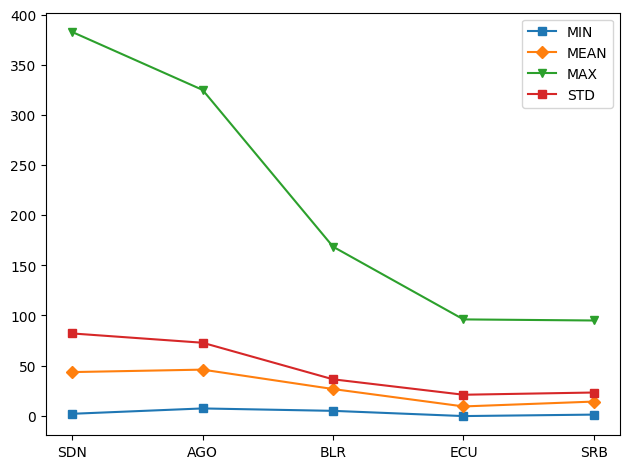

In [43]:
Plot_Line_plot_multiple_cols(top_5_max,['min','mean','max','std'])
Save_plot("top_5_max")
plt.show()

##### Top 5 Countries with Min infliation in 22 years

In [16]:
top_5_min = describe_infliation.nlargest(5,'min')
top_5_min

,count,mean,std,min,25%,50%,75%,max
Country Code,,,,,,,,
AGO,22.0,45.993530,72.815276,7.280387,12.683174,18.355149,30.484863,324.996872
IRN,22.0,19.436244,10.446370,7.245425,12.721791,15.614760,26.072667,43.389016
GHA,22.0,16.005110,9.493038,7.143640,10.161664,12.025553,17.378468,41.509496
ZMB,22.0,13.550775,6.322465,6.429397,7.980597,11.551464,18.235277,26.030412
TUR,22.0,16.270939,14.962128,6.250977,8.275981,9.244406,16.043553,54.915371


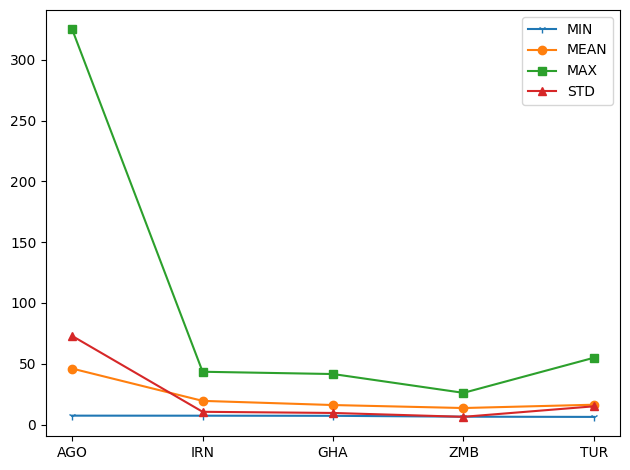

In [45]:
Plot_Line_plot_multiple_cols(top_5_min,['min','mean','max','std'])
Save_plot("top_5_min")
plt.show()

We are taking top 10 max infliation countires

In [18]:
top_20_max_inf = describe_infliation.nlargest(15,'max')
top_20_min_inf_countries = top_20_max_inf.index.to_list()
top_20_min_inf_countries

['SDN',
 'AGO',
 'BLR',
 'ECU',
 'SRB',
 'TUR',
 'IRQ',
 'DOM',
 'UKR',
 'ROU',
 'ETH',
 'IRN',
 'GHA',
 'LSO',
 'MDA']

In [19]:
box_plt_df = df_infilation.drop(['Country Name', 'Indicator Name', 'Indicator Code'],axis=1)
box_plt_df = box_plt_df[box_plt_df['Country Code'].isin(top_20_min_inf_countries)]
box_plt_df_melted = box_plt_df.melt(id_vars='Country Code', var_name='Year', value_name='Value')
box_plt_df_melted.head()

,Country Code,Year,Value
0,AGO,2000,324.996872
1,BLR,2000,168.620236
2,DOM,2000,7.724136
3,ECU,2000,96.094114
4,ETH,2000,0.662458


In [20]:
box_plt_df_melted.rename(columns={'Country Code': 'Country_Code'}, inplace=True)

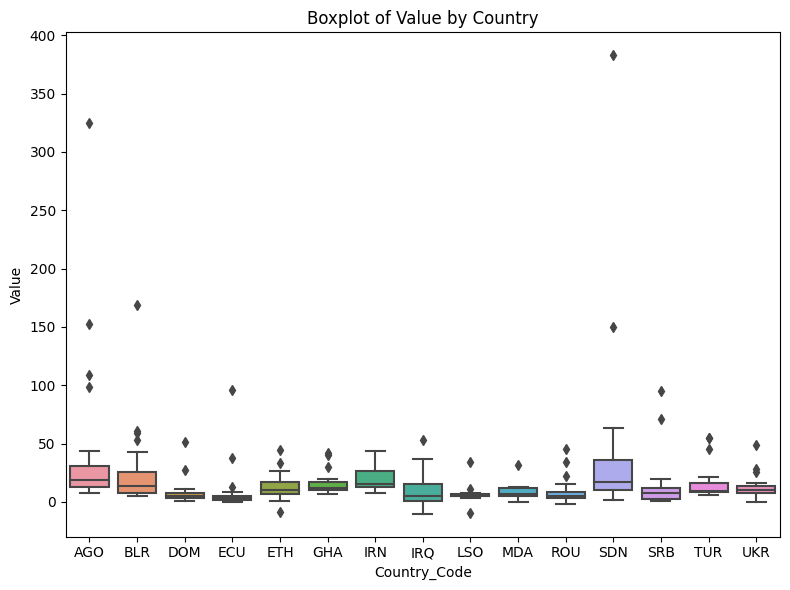

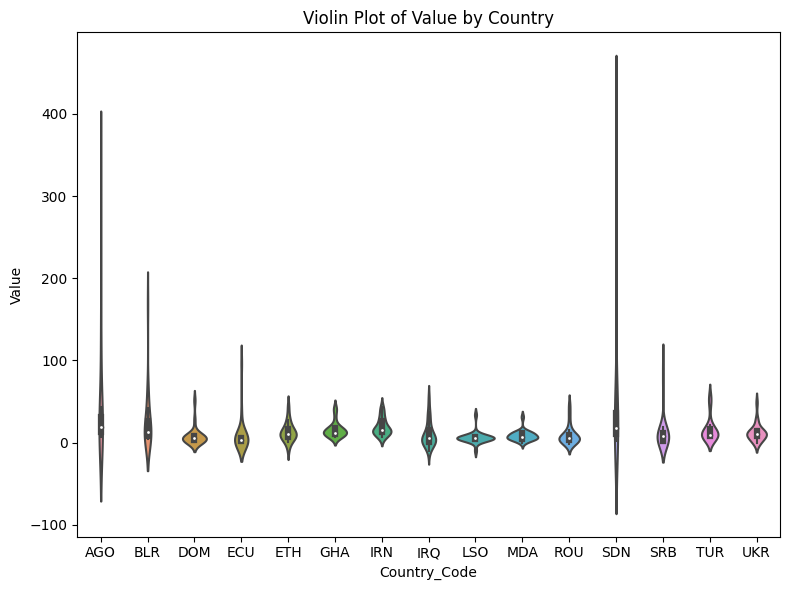

c:\Users\PorallaPradhyumna\.conda\envs\env_rl\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)
C:\Users\PorallaPradhyumna\AppData\Local\Temp\ipykernel_36520\1362688750.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


<Figure size 800x600 with 0 Axes>

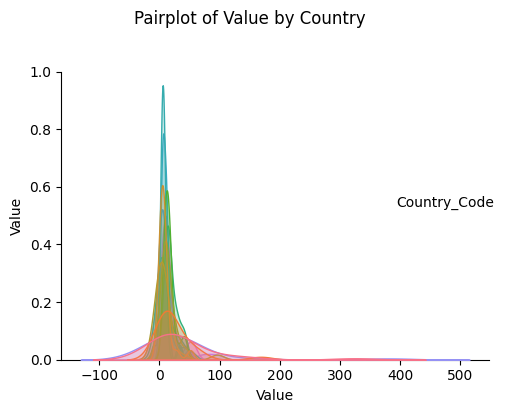

Descriptive Statistics:
              count       mean        std        min        25%        50%  \
Country_Code                                                                 
AGO            22.0  45.993530  72.815276   7.280387  12.683174  18.355149   
BLR            22.0  26.629222  36.336343   4.872302   7.908499  13.240073   
DOM            22.0   8.068856  11.116685   0.836746   3.350776   5.027159   
ECU            22.0   9.266394  20.939907  -0.338872   1.865245   3.426563   
ETH            22.0  12.978530  11.560107  -8.237845   7.033520  10.328543   
GHA            22.0  16.005110   9.493038   7.143640  10.161664  12.025553   
IRN            22.0  19.436244  10.446370   7.245425  12.721791  15.614760   
IRQ            22.0  10.395885  15.088186 -10.067493   0.778955   5.390209   
LSO            22.0   6.251724   7.153973  -9.616154   4.780132   5.278687   
MDA            22.0   8.601141   6.271646  -0.062719   4.900534   7.027040   
ROU            22.0   9.058443  11.47157

In [46]:
df = box_plt_df_melted.copy()

# Descriptive Statistics
descriptive_stats = df.groupby('Country_Code')['Value'].describe()

# Boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x='Country_Code', y='Value', data=df)
plt.title('Boxplot of Value by Country')
Save_plot('Boxplot of Value by Country')
plt.show()

# Violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(x='Country_Code', y='Value', data=df)
plt.title('Violin Plot of Value by Country')
Save_plot('Violin Plot of Value by Country')
plt.show()

# Pairplot
plt.figure(figsize=(8, 6))
sns.pairplot(df, hue='Country_Code', vars=['Value'], height=4)
plt.suptitle('Pairplot of Value by Country', y=1.02)
Save_plot('Pairplot of Value by Country')
plt.show()

# Correlation matrix
correlation_matrix = df.corr()

# Display descriptive statistics and correlation matrix
print('Descriptive Statistics:')
print(descriptive_stats)
print('\nCorrelation Matrix:')
print(correlation_matrix)

In [22]:

groups=[]
contry_codes = box_plt_df_melted['Country_Code'].unique()
for contry in contry_codes:
    groups.append(box_plt_df_melted[box_plt_df_melted['Country_Code']==contry]['Value'].to_list())


In [23]:
import scipy.stats as stats


# Perform the one-way ANOVA
f_statistic, p_value = stats.f_oneway(*groups)

# Print the results
print("F-statistic:", f_statistic)
print("p-value:", p_value)

# If the p-value is less than 0.05, then there is a significant difference between the groups
if p_value < 0.05:
    print("There is a significant difference between the groups.")
else:
    print("There is no significant difference between the groups.")


F-statistic: 3.2127958302858906
p-value: 9.110906227199282e-05
There is a significant difference between the groups.


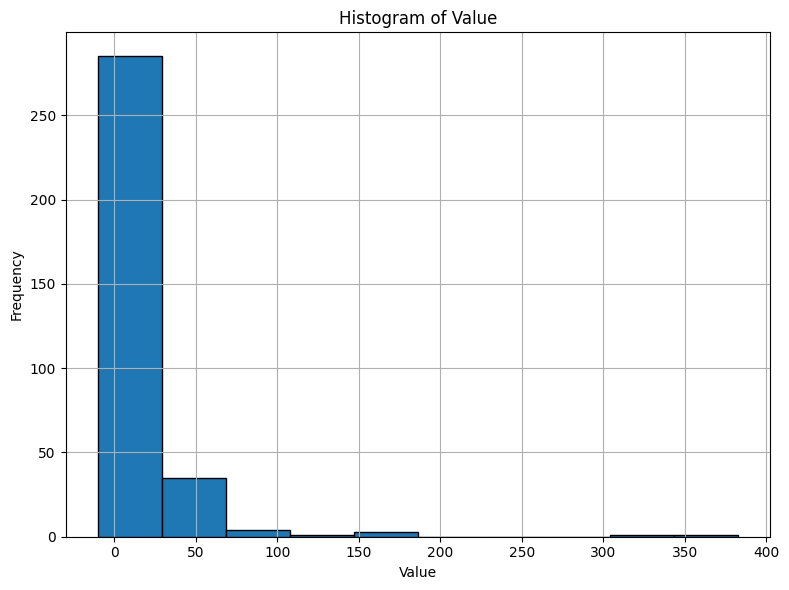

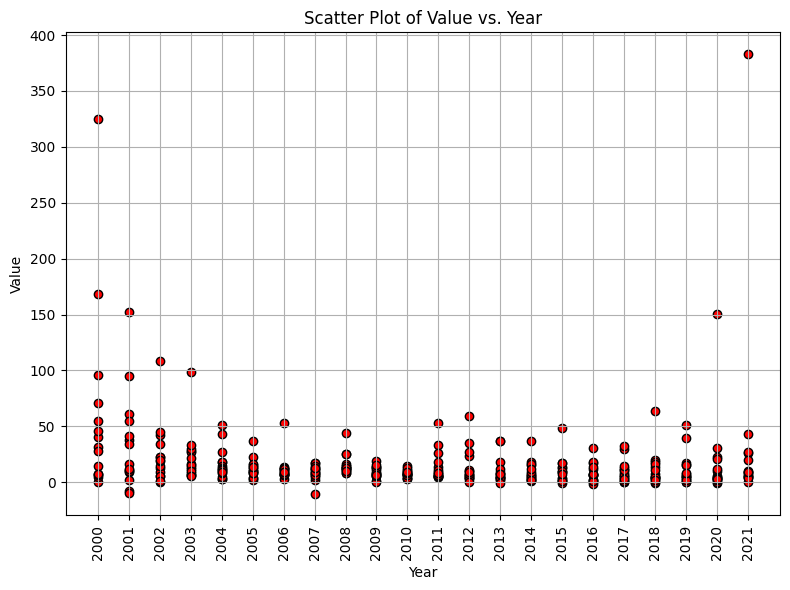

In [47]:
plt.figure(figsize=(8, 6))
plt.hist(box_plt_df_melted["Value"], bins=10, edgecolor="black")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Histogram of Value")
Save_plot("Histogram of Value")
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.scatter(box_plt_df_melted["Year"], box_plt_df_melted["Value"], c="red", edgecolors="black")
plt.xlabel("Year")
plt.ylabel("Value")
plt.xticks(rotation="vertical")
plt.title("Scatter Plot of Value vs. Year")
Save_plot("Scatter Plot of Value vs. Year")

plt.grid(True)
plt.show()



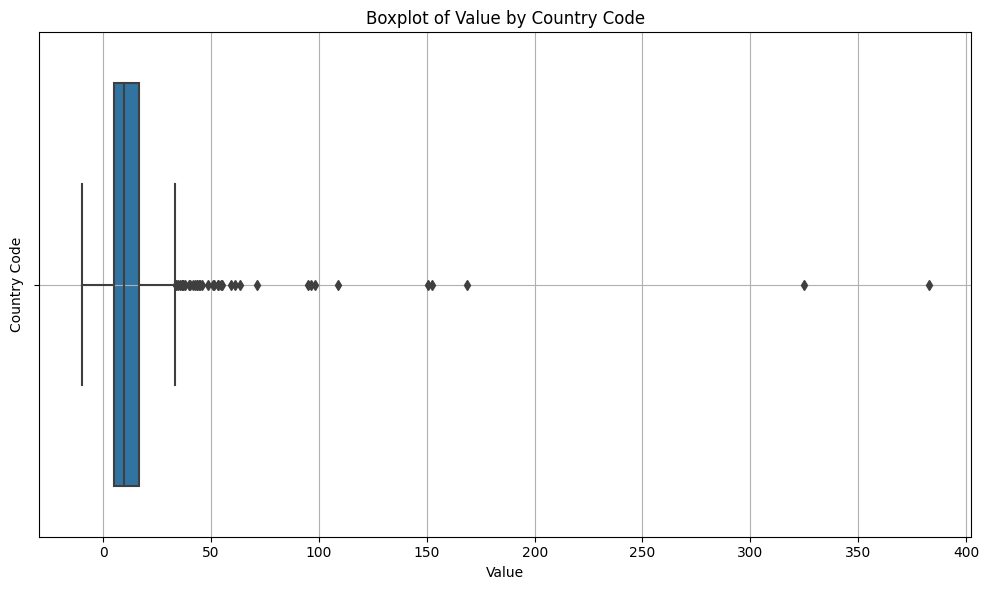

In [48]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=box_plt_df_melted,x='Value',hue='Country_Code')
plt.xlabel("Value")
plt.ylabel("Country Code")
plt.title("Boxplot of Value by Country Code")
Save_plot("Boxplot of Value by Country Code")
plt.grid(True)
plt.show()

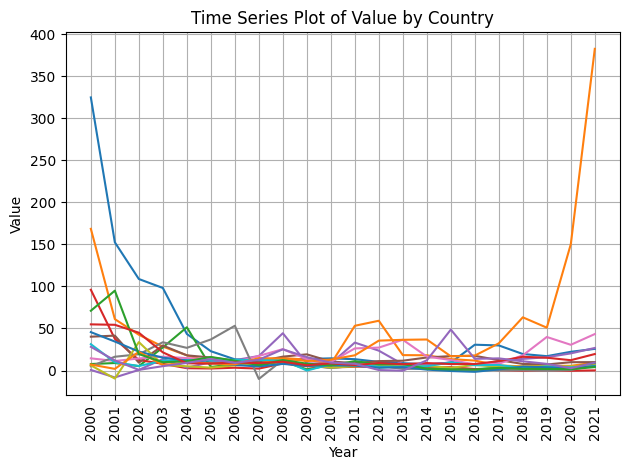

In [49]:
for country in box_plt_df_melted["Country_Code"].unique():
    country_data = box_plt_df_melted[box_plt_df_melted["Country_Code"] == country]
    plt.plot(country_data["Year"], country_data["Value"], label=country)

plt.xlabel("Year")
plt.ylabel("Value")
plt.title("Time Series Plot of Value by Country")
plt.grid(True)
plt.xticks(rotation='vertical')
Save_plot("Time Series Plot of Value by Country")

plt.show()


Correlation Matrix:


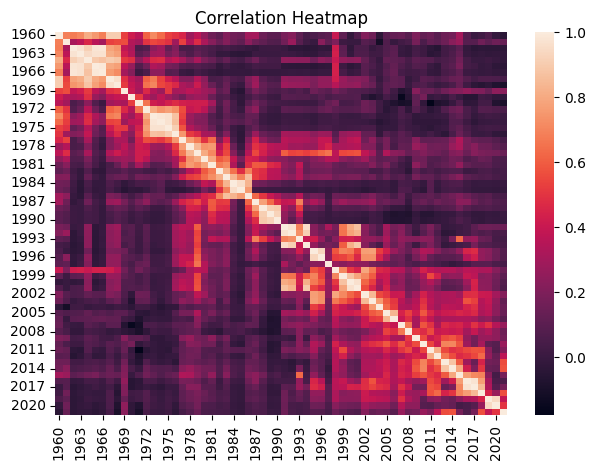

In [50]:
correlations = df_infilation.corr()
print("Correlation Matrix:")
#print(correlations)

# Create a heatmap to visualize the correlations
sns.heatmap(correlations)
plt.title("Correlation Heatmap")
Save_plot("Correlation Heatmap")
plt.show()

##### Regression Analysis

Mean Squared Error: 607.4204302417166
Intercept: 1443.6148681063153
Slope: [-0.70943024]


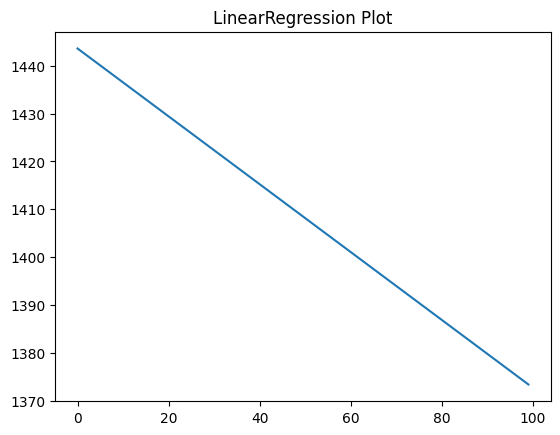

In [28]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Create a DataFrame from the provided data
data = box_plt_df_melted.copy()
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data["Year"], data["Value"], test_size=0.2, random_state=42)

# Create and fit a linear regression model
model = LinearRegression()
model.fit(X_train.values.reshape(-1, 1), y_train)

# Make predictions on the test set
y_pred = model.predict(X_test.values.reshape(-1, 1))

# Evaluate the model's performance

from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Print the model's coefficients
print("Intercept:", model.intercept_)
print("Slope:", model.coef_)

sns.lineplot(data=[model.coef_[0]*i+model.intercept_ for i in range(100)])
plt.title('LinearRegression Plot')
plt.show()

C:\Users\PorallaPradhyumna\AppData\Local\Temp\ipykernel_36520\1362688750.py:2: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


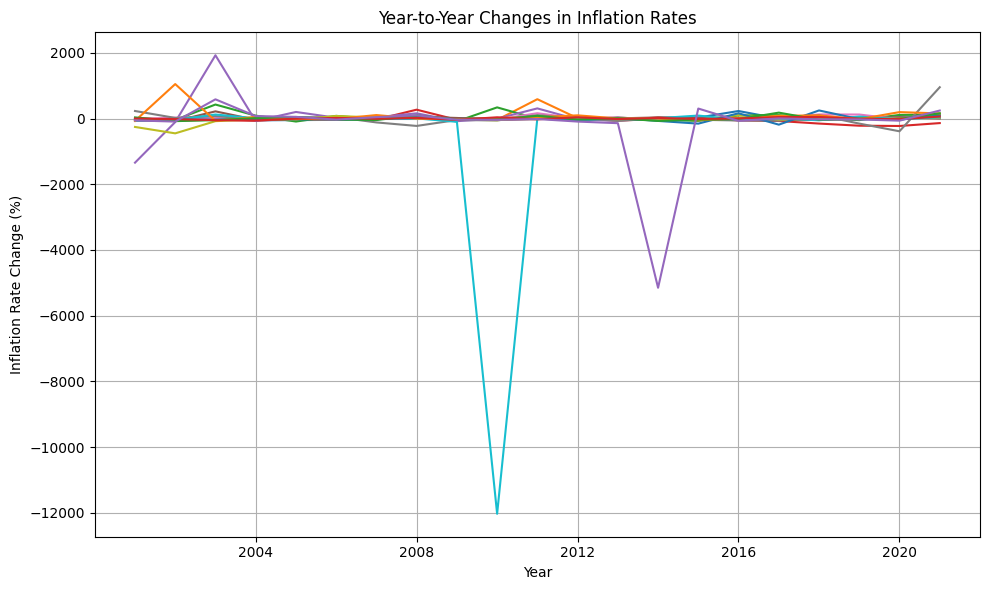

In [51]:
df = box_plt_df_melted.copy()

# Convert 'Year' column to datetime type for proper sorting
df['Year'] = pd.to_datetime(df['Year'], format='%Y')

# Sort the DataFrame by 'Country Name' and 'Year'
df.sort_values(by=['Country_Code', 'Year'], inplace=True)

# Calculate year-to-year changes
df['Inflation Rate Change'] = df.groupby('Country_Code')['Value'].pct_change() * 100

# Plot the results
plt.figure(figsize=(10, 6))  # Adjust the figure size to a smaller value
for country, country_df in df.groupby('Country_Code'):
    plt.plot(country_df['Year'], country_df['Inflation Rate Change'], label=country)

plt.title('Year-to-Year Changes in Inflation Rates')
plt.xlabel('Year')
plt.ylabel('Inflation Rate Change (%)')
#plt.legend()
plt.grid(True)
plt.tight_layout()  # Adjust the layout to prevent cropping of the plot
Save_plot('Year-to-Year Changes in Inflation Rates')
plt.show()



In [30]:
import pandas as pd
from scipy.stats import chi2_contingency

df = box_plt_df_melted.copy()
contingency_table = pd.crosstab(df['Country_Code'], df['Year'])

# Chi-square test
chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)

# Displaying the results
print(f"Chi2 Stat: {chi2_stat}")
print(f"P-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Contingency Table:")
print(contingency_table)

Chi2 Stat: 0.0
P-value: 1.0
Degrees of Freedom: 294
Contingency Table:
Year          2000  2001  2002  2003  2004  2005  2006  2007  2008  2009  ...  \
Country_Code                                                              ...   
AGO              1     1     1     1     1     1     1     1     1     1  ...   
BLR              1     1     1     1     1     1     1     1     1     1  ...   
DOM              1     1     1     1     1     1     1     1     1     1  ...   
ECU              1     1     1     1     1     1     1     1     1     1  ...   
ETH              1     1     1     1     1     1     1     1     1     1  ...   
GHA              1     1     1     1     1     1     1     1     1     1  ...   
IRN              1     1     1     1     1     1     1     1     1     1  ...   
IRQ              1     1     1     1     1     1     1     1     1     1  ...   
LSO              1     1     1     1     1     1     1     1     1     1  ...   
MDA              1     1     1     1  

     Country_Code       Value  Value Lag 1  Value Lag 2
Year                                                   
2000          AGO  324.996872          NaN          NaN
2000          BLR  168.620236   324.996872          NaN
2000          DOM    7.724136   168.620236   324.996872
2000          ECU   96.094114     7.724136   168.620236
2000          ETH    0.662458    96.094114     7.724136
...           ...         ...          ...          ...
2021          ROU    5.052329     5.106411     6.047746
2021          SDN  382.815998     5.052329     5.106411
2021          SRB    4.085103   382.815998     5.052329
2021          TUR   19.596493     4.085103   382.815998
2021          UKR    9.363139    19.596493     4.085103

[330 rows x 4 columns]


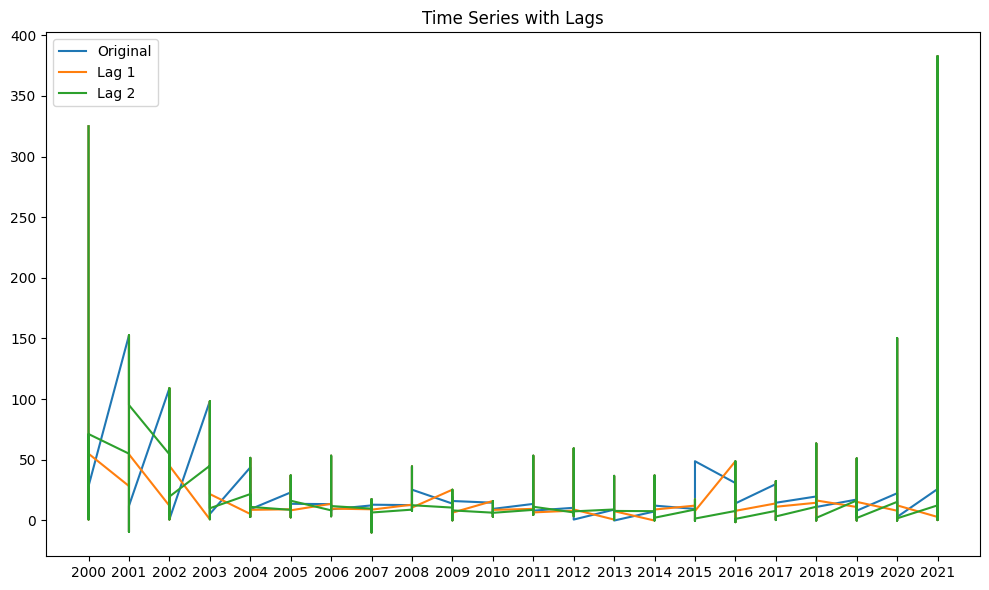

ADF Test on Original Time Series:
ADF Statistic: -1.4792543569598047
p-value: 0.5437478163132066
Critical Values: {'1%': -3.4514843502727306, '5%': -2.8708485956333556, '10%': -2.571729625657462}

ADF Test on First-order Difference:
ADF Statistic: -6.615449476135714
p-value: 6.22398361157593e-09
Critical Values: {'1%': -3.4514843502727306, '5%': -2.8708485956333556, '10%': -2.571729625657462}


In [52]:
from statsmodels.tsa.stattools import adfuller
df = box_plt_df_melted.copy()
df.set_index('Year', inplace=True)

# Lag Analysis
df['Value Lag 1'] = df['Value'].shift(1)
df['Value Lag 2'] = df['Value'].shift(2)

# Display the DataFrame with lag columns
print(df)

# Plot the time series with lags
plt.figure(figsize=(10, 6))
plt.plot(df['Value'], label='Original')
plt.plot(df['Value Lag 1'], label='Lag 1')
plt.plot(df['Value Lag 2'], label='Lag 2')
plt.legend()
plt.title('Time Series with Lags')
Save_plot('Time Series with Lags')
plt.show()

# Stationarity Check using Augmented Dickey-Fuller Test
def adf_test(timeseries):
    result = adfuller(timeseries, autolag='AIC')
    print('ADF Statistic:', result[0])
    print('p-value:', result[1])
    print('Critical Values:', result[4])

# Perform ADF test on the original time series
print('ADF Test on Original Time Series:')
adf_test(df['Value'])

# Perform ADF test on the first-order difference (lag 1)
print('\nADF Test on First-order Difference:')
adf_test(df['Value'].diff().dropna())